# Imports

In [62]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# needed for p-value
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import boston_valuation as val

%matplotlib inline

# Gather data

In [63]:
boston_dataset = load_boston()

In [64]:
# this will need to be converted to a data frame
type(boston_dataset)

sklearn.utils.Bunch

In [65]:
# print it (ugly)
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [66]:
type(boston_dataset.data)

numpy.ndarray

In [67]:
# returns a list of Python attributes for an object
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [68]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [69]:
dir(boston_dataset.data)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [70]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [71]:
# get the number of rows/columns
boston_dataset.data.shape

(506, 13)

In [72]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [73]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [74]:
# Actual prices in thousands 
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas dataframes

In [75]:
# Create a pandas dataframe
# using the feature_names attribute for columns
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add a new column with the price (target)
data['PRICE'] = boston_dataset.target

In [76]:
# print the top rows
# defaults to 5 rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
# print the bottom 10
data.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [78]:
# print the count for each column
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [79]:
# this is the long way to check fo rmissing values
pd.isnull(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
# check for missing values
# true means it is missing values
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [81]:
# shows nulls, names, and number of entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


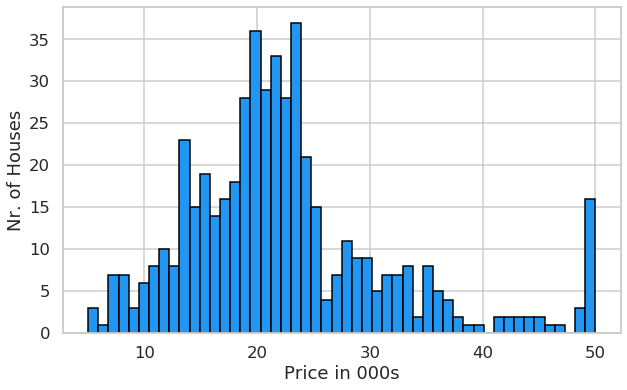

In [82]:
plt.figure(figsize=(10, 6))
# bins determines how many bars we have
# ec is edge color so it puts borders on the bars
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

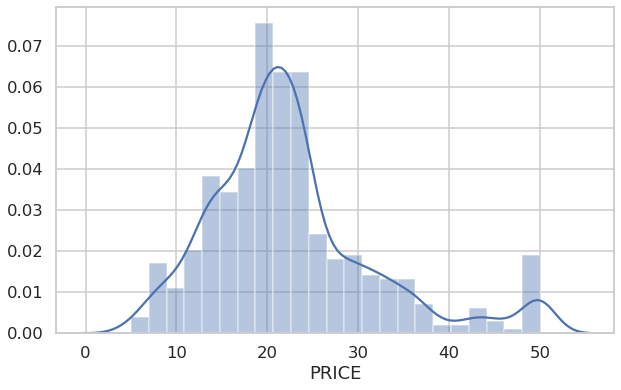

In [83]:
# use seaborn instead of matplotlib
# most basic histogram
plt.figure(figsize=(10, 6))
sns.distplot(data['PRICE'])
plt.show()

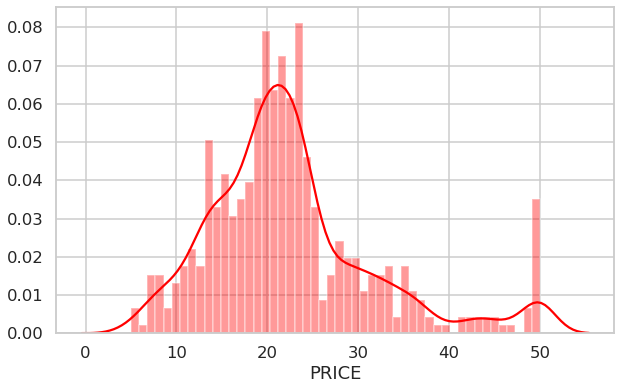

In [84]:
# use seaborn instead of matplotlib
plt.figure(figsize=(10, 6))
# bins does the same as matplotlib
# hist = False would get rid of histogram
# KDE is the probablilty function, the line
sns.distplot(data['PRICE'], bins=50, hist=True, kde=True, color='red')
plt.show()

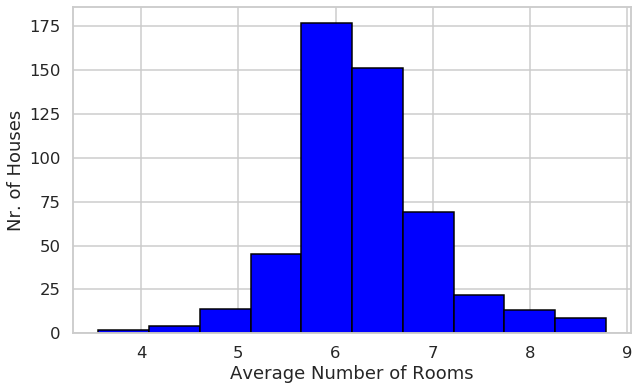

In [85]:
plt.figure(figsize=(10, 6))
plt.hist(data['RM'], ec='black', color='blue')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [86]:
# calculae the average number of rooms
data['RM'].mean()

6.284634387351787

## RAD - masure of access to highways

In [87]:
data['RAD']

0       1.0
1       2.0
2       2.0
3       3.0
4       3.0
5       3.0
6       5.0
7       5.0
8       5.0
9       5.0
10      5.0
11      5.0
12      5.0
13      4.0
14      4.0
15      4.0
16      4.0
17      4.0
18      4.0
19      4.0
20      4.0
21      4.0
22      4.0
23      4.0
24      4.0
25      4.0
26      4.0
27      4.0
28      4.0
29      4.0
       ... 
476    24.0
477    24.0
478    24.0
479    24.0
480    24.0
481    24.0
482    24.0
483    24.0
484    24.0
485    24.0
486    24.0
487    24.0
488     4.0
489     4.0
490     4.0
491     4.0
492     4.0
493     6.0
494     6.0
495     6.0
496     6.0
497     6.0
498     6.0
499     6.0
500     6.0
501     1.0
502     1.0
503     1.0
504     1.0
505     1.0
Name: RAD, Length: 506, dtype: float64

In [88]:
# get the counts
# this is an index oc accessiility
# lower values man less access
# columns are value, # of houses
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

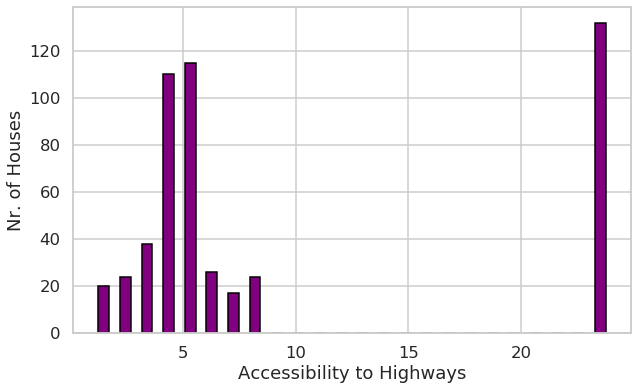

In [89]:
plt.figure(figsize=(10, 6))
# since there are 24 values from above 
plt.hist(data['RAD'], bins=24, ec='black', color='purple', rwidth=0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

<class 'pandas.core.series.Series'>
Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')


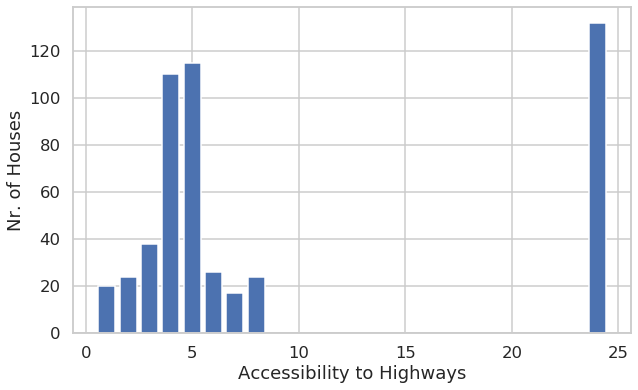

In [90]:
# different way to graph it
frequency = data['RAD'].value_counts()
print(type(frequency))
print(frequency.index)
# this prints the same as above
#frequency.axes[0]
plt.figure(figsize=(10, 6))
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
# x axis is
# y axis is the values (count of how man homes have a RAD rating of Y)
plt.bar(frequency.index, height=frequency)
plt.show()

In [91]:
# tag houses that are on the Charles river
# CHAS from 'print(boston_dataset.DESCR)'
# true/false
# 0 - not on the river
# 1 - on the river
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [92]:
data['PRICE'].min()

5.0

In [93]:
data['PRICE'].max()

50.0

In [122]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [123]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [124]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [125]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [126]:
# very useful to see a summary of all the data 
# shift + tab will show a description
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [127]:
# call the corr method on data, in this case room size
data['PRICE'].corr(data['RM'])

0.695359947071539

In [128]:
# Calculate the correlation between property prices and the pupil teacher ratio
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

### that is negative because there are more students than teachers

In [129]:
# call the corr method on the entire data frame
# and display them in relation to the other factors
# shift+tab will show you the different methods
# this uses Pearson
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [130]:
# hide the values that we don't need since there are so many dups
# basically 2 triangles in the data displayed above
mask = np.zeros_like(data.corr())
# retrieve indices from top triangle
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
# display it
# true is mapped to 1, false is mapped to zero
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

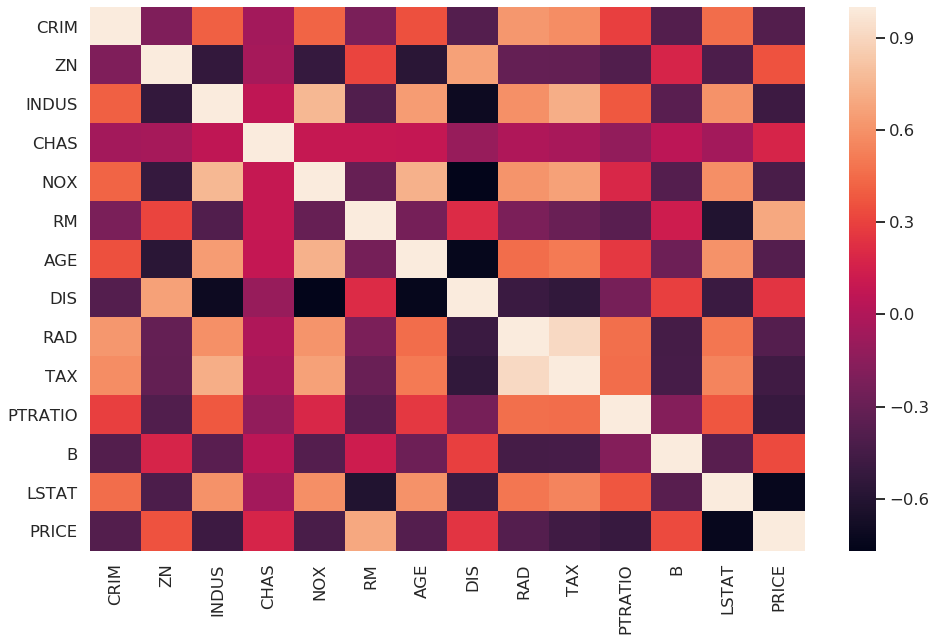

In [131]:
# basic heatmap
plt.figure(figsize=(16,10))
# use Seaborn and create a heat map
sns.heatmap(data.corr())
# strong positive correlations are dark red
# strong negative are dark blue
# darker the color the stronger the positive relationship
plt.show()

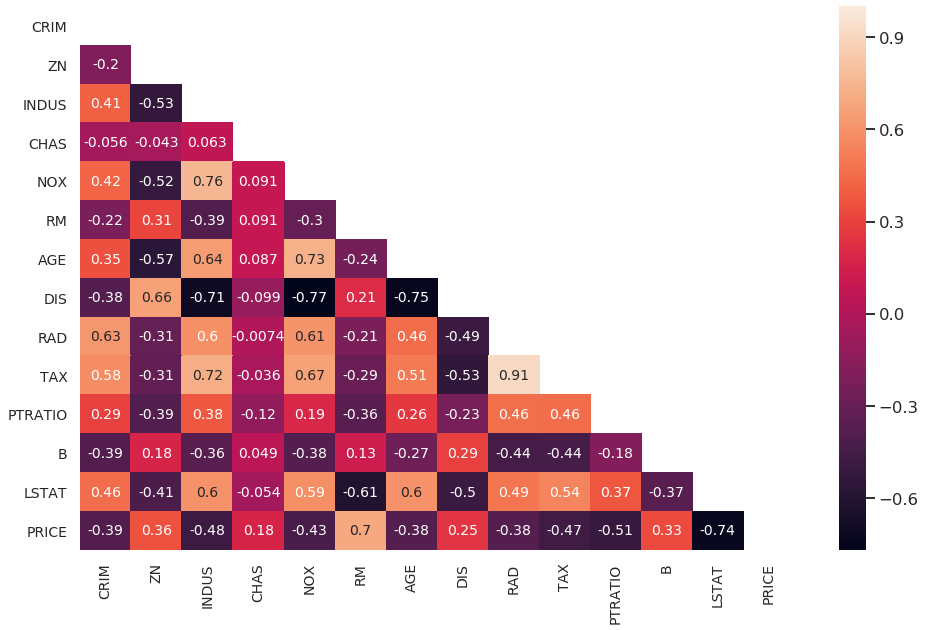

In [132]:
# heatmap
plt.figure(figsize=(16,10))
# use Seaborn and create a heat map
# mask is a keyword and the variable from above
# annot puts the values in the map
# annot_kws sets font size
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
# set the style, makes background white
sns.set_style('white')
# increase the font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

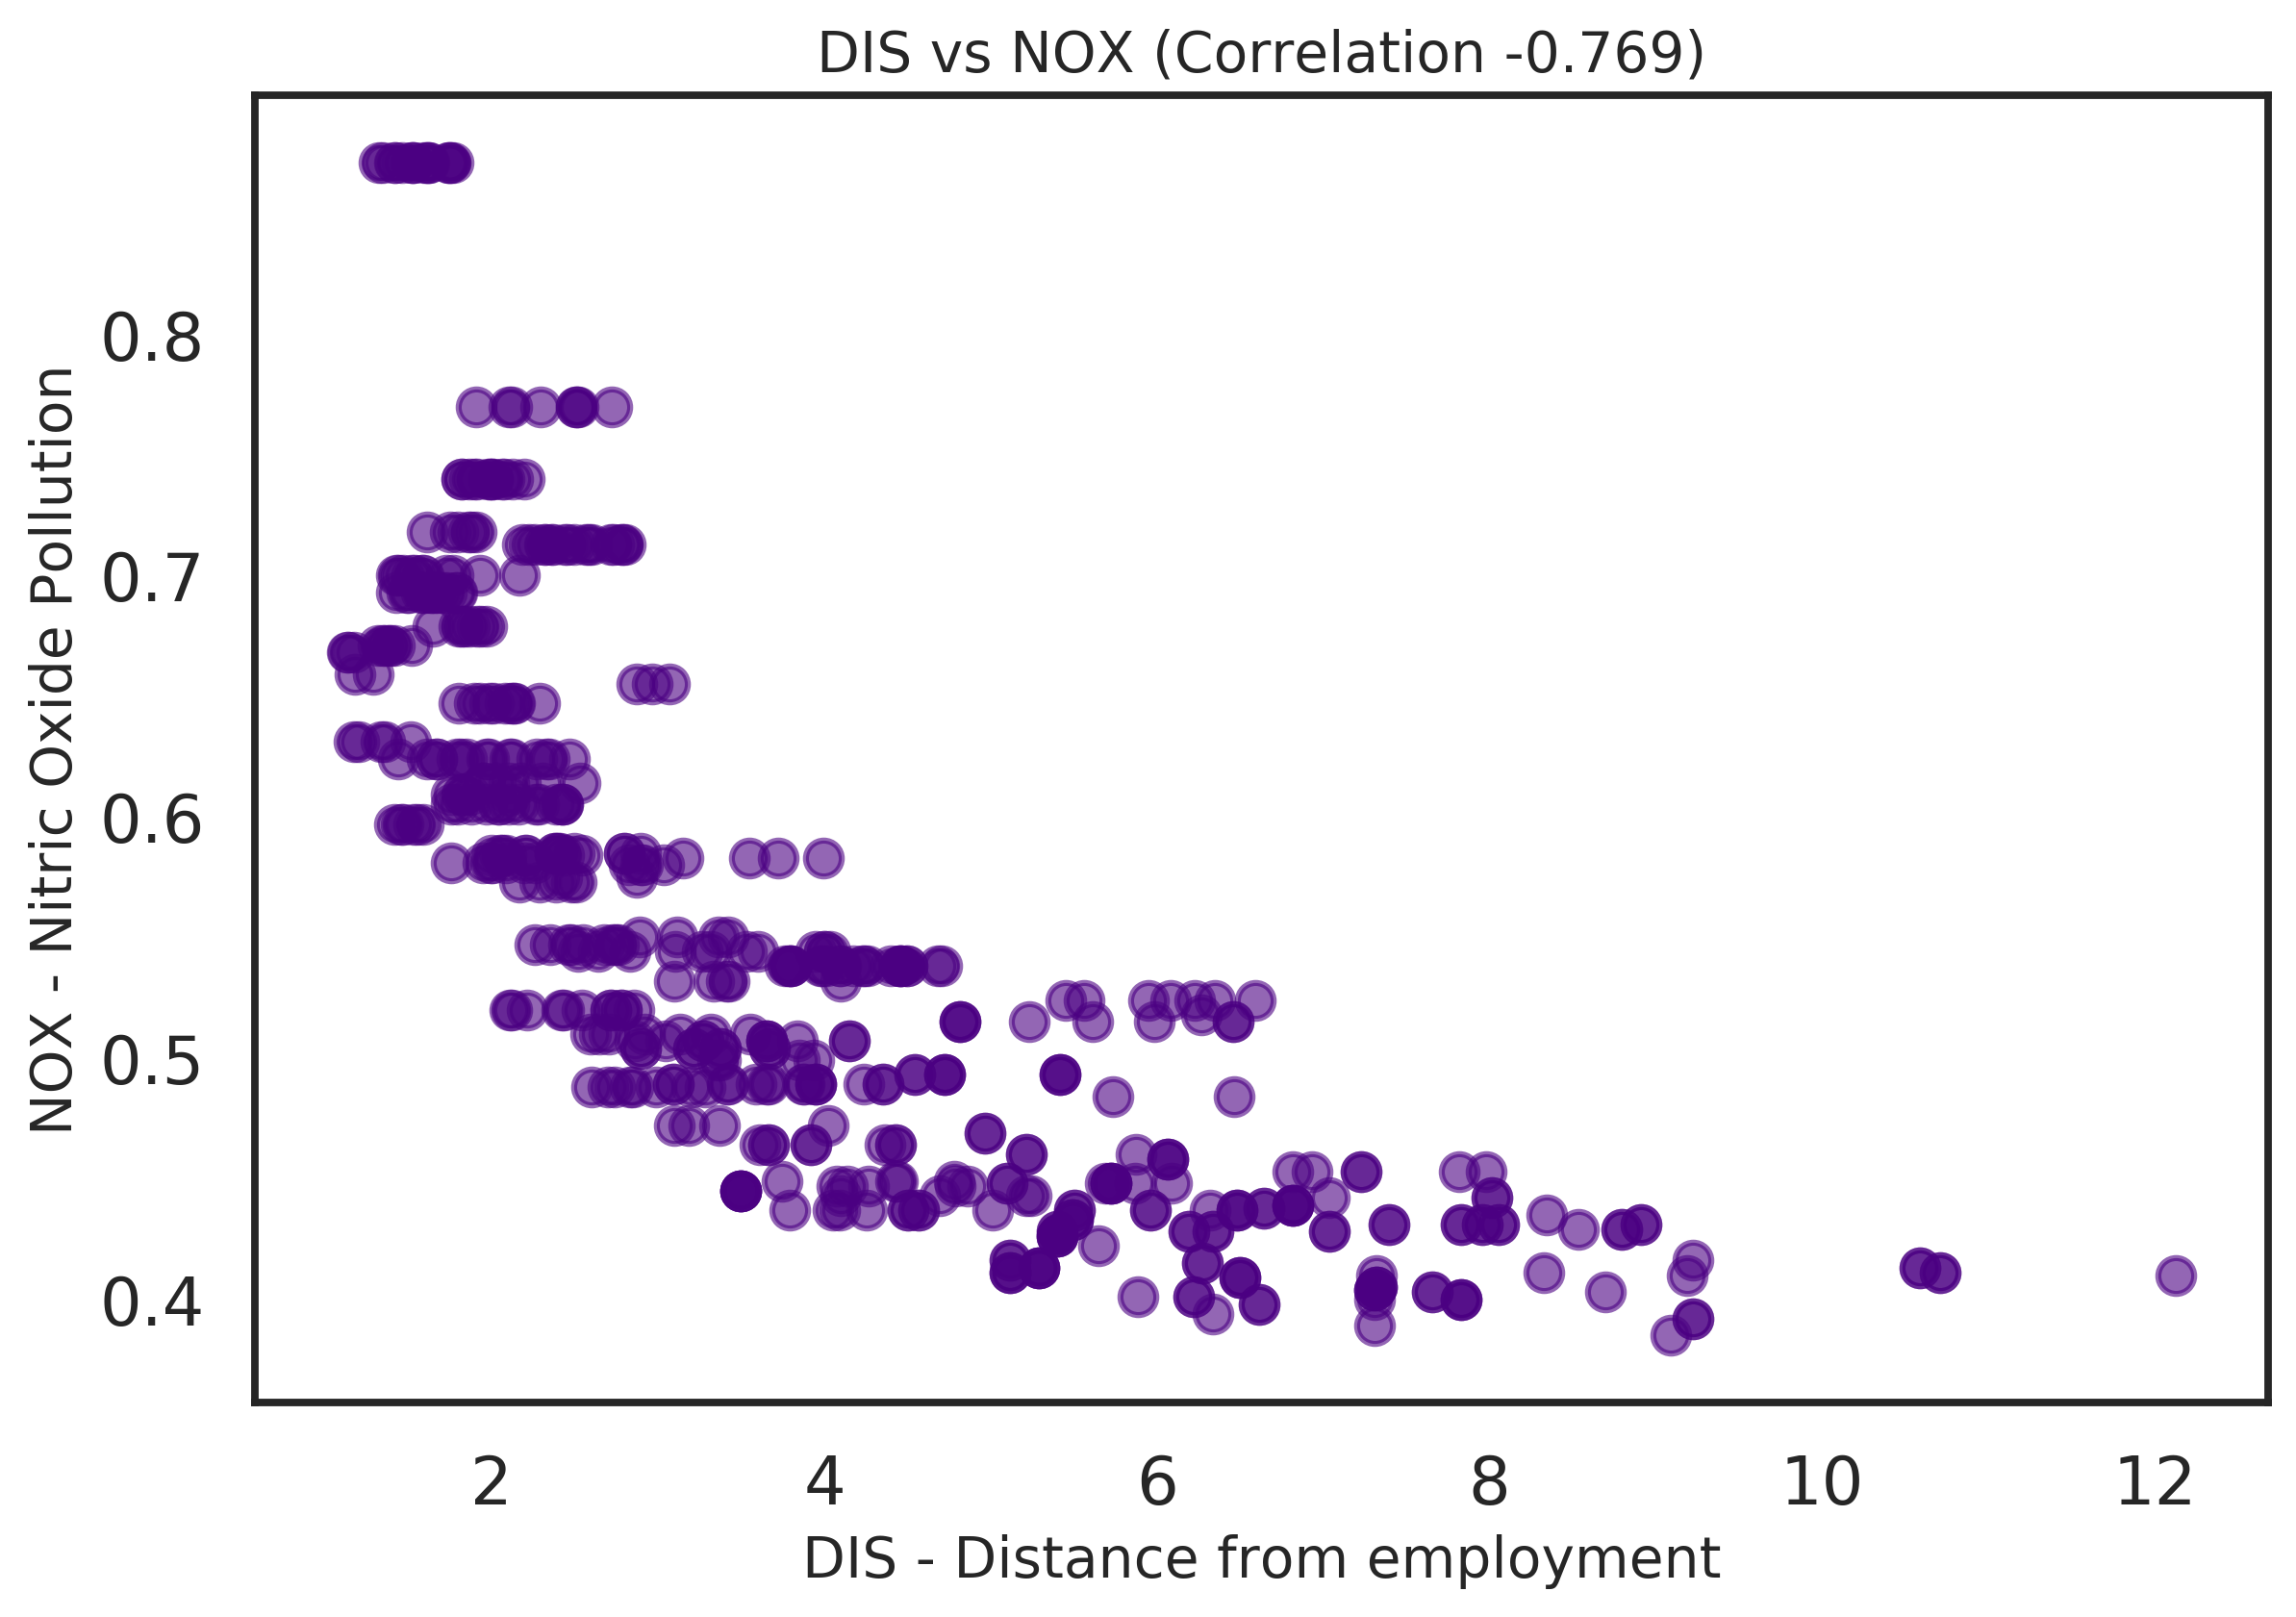

In [133]:
# plot relationship between pollution and distance in your head
# correlaion
# round it to 3 decimal places
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9, 6), dpi=300)
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')
# set the title and use the value in the title
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()

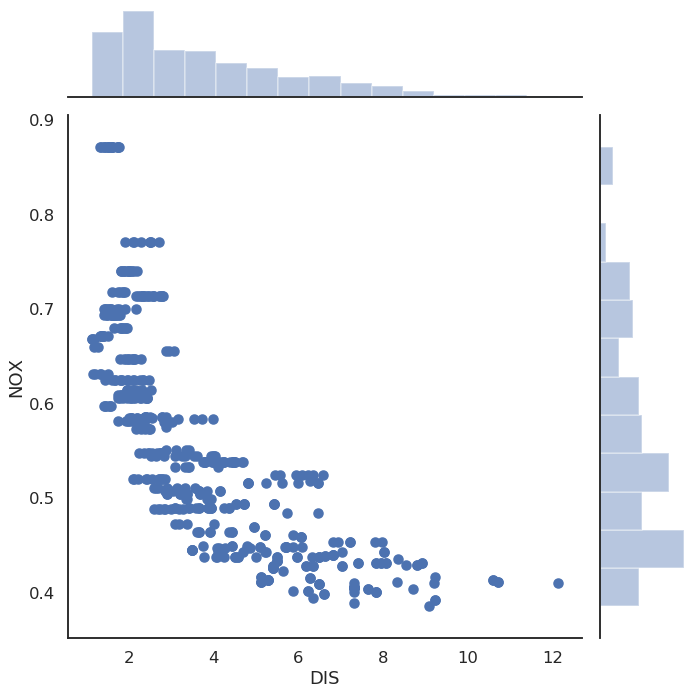

In [134]:
# base Seaborn and not matplotlib
sns.jointplot(x=data['DIS'], y=data['NOX'], size=10)
plt.show()

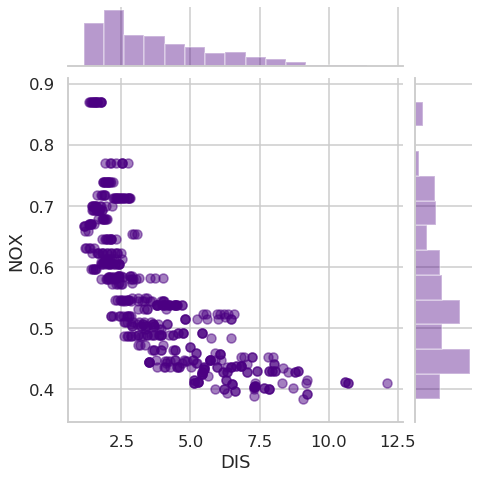

In [135]:
# expanded seaborn
# this line resets the style
sns.set()
# this allows for templates to be used
# talk is for prezos
sns.set_context('talk')
sns.set_style('whitegrid')
# joint_kws is keyword args for transparency (among other things)
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

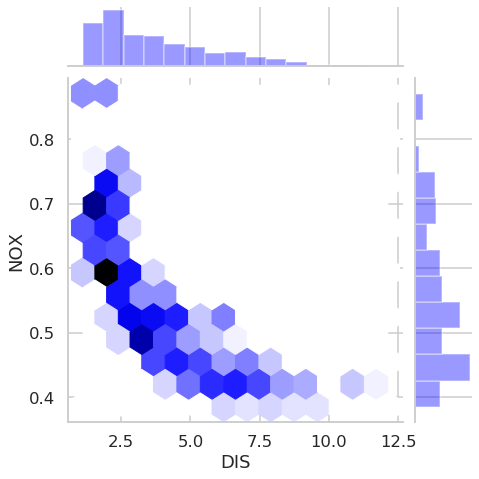

In [136]:
# yet another way to display
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
# kind is set to hex
# kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', size=7, color='blue')
plt.show()

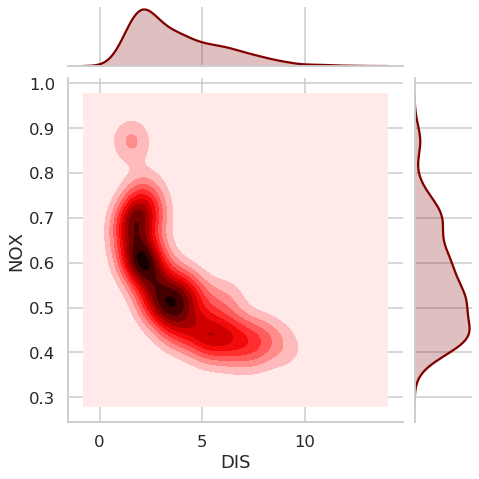

In [137]:
# yet another way to display
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
# kind is set to kde
# kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='kde', size=7, color='maroon')
plt.show()

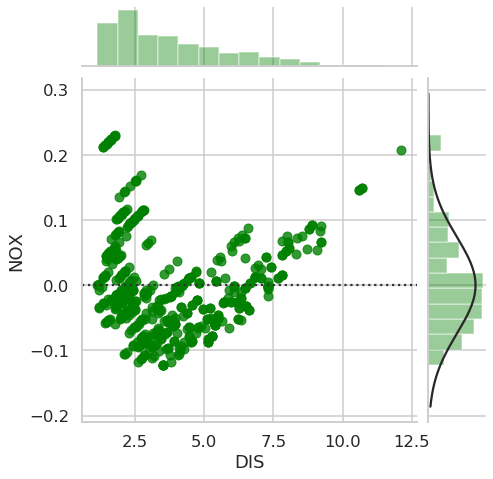

In [138]:
# yet another way to display
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
# kind is set to kde
# kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='resid', size=7, color='green')
plt.show()

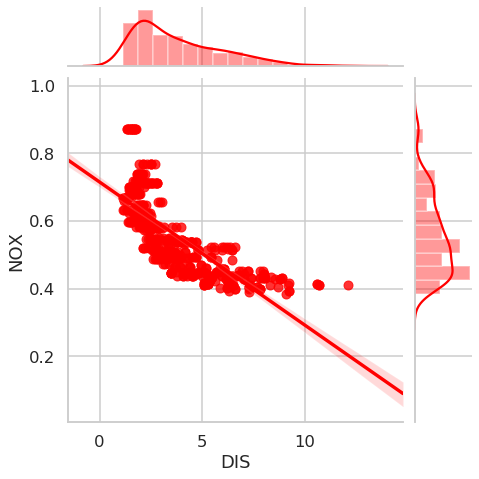

In [139]:
# yet another way to display
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
# kind is set to kde
# kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='reg', size=7, color='red')
plt.show()

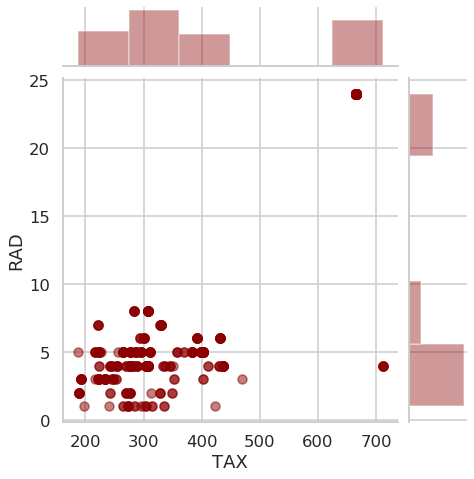

In [140]:
# Radial highways vs Tax
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], size=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

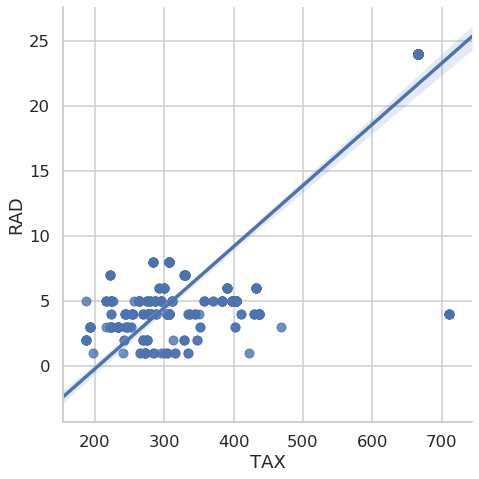

In [141]:
# simplified plot sng seaborn
# Plot data and regression model fits across a FacetGrid.
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()

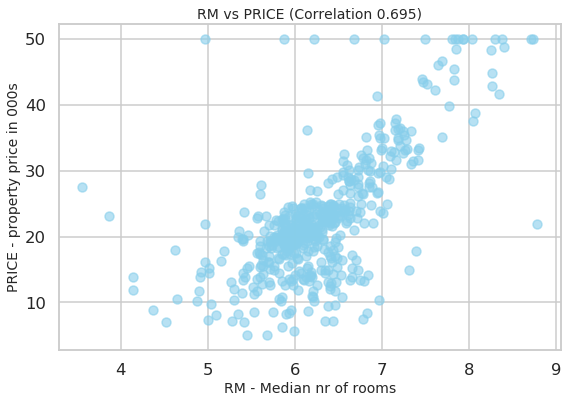

In [142]:
# plot # of rooms vs target
# long way
rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='skyblue')

plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms', fontsize=14)
plt.ylabel('PRICE - property price in 000s', fontsize=14)
plt.show()

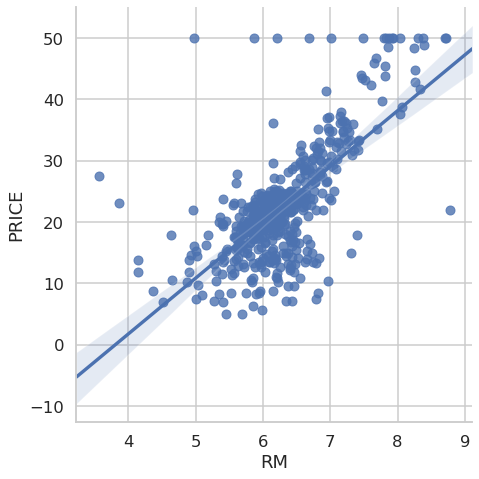

In [143]:
# plot # of rooms vs target
# short way
sns.lmplot(x='RM', y='PRICE', data=data, size=7)
plt.show()

In [144]:
%%time
# takes a long time to run
# will show all the different plots
# commenting out since it takes so long to run
#sns.pairplot(data)
#plt.show()
# time stats
# CPU times: user 31.3 s, sys: 12 ms, total: 31.3 s
# Wall time: 31.3 s

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [145]:
%%time
# reg makes it regression
# commenting out since it takes so long to run
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
# plt.show()

# time out:
#CPU times: user 2min 17s, sys: 1.28 s, total: 2min 18s
#Wall time: 47.7 s

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


## 67 - Training & Test Dataset Split

In [146]:
# set prices
prices = data['PRICE']
# this dropped the price
# axis = 1 is a row
# axis = 0 is for a column
features = data.drop('PRICE', axis=1)
# print it
print(features)


         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [147]:
# set the training values
# tuple unpacking
# returns a training and a testing data set for 
# both features and the targets
# args
# which features and which targets to split up
# 1st is the features variable
# 2nd is proces
# 3rd is the kind of split i.e. 50/50, 60/40, or whatever
# below is 80/20
# random state is just here so we get the same number but not req'd 
# sets the starting point for the random number generator
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# % of training set
# should be close to our split, 80/20
len(X_train)/len(features)

0.7984189723320159

In [152]:
# % of test data set
# this should be the 20 part of 80/20
X_test.shape[0]/features.shape[0]

0.2015810276679842

## 68 - Multivariable Regression

In [153]:
# print the data frame
# coef is how that data point relates to price
# really care about pos/neg
# the columns arg sets the column name
print('coef is what we care about')
print('CHAS at ~+1.9 translates to the property having aobut a $2K premium')
print('adding 1 room addes ~$3K')
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

coef is what we care about
CHAS at ~+1.9 translates to the property having aobut a $2K premium
adding 1 room addes ~$3K


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [154]:
regr = LinearRegression()
regr.fit(X_train, y_train)

#Cprint r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## 69 - Multivariable Regression

In [155]:
regr = LinearRegression()
regr.fit(X_train, y_train)

## print the r-squared values for training and test data
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)


Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept 36.53305138282439


## 71 - Data Transformations

In [156]:
# calculate skew
print('an even data distribution would have a skew of zero')
data['PRICE'].skew()

an even data distribution would have a skew of zero


1.1080984082549072

In [157]:
# apply the log function to price
y_log = np.log(data['PRICE'])
print(y_log.head())
print(y_log.tail())

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64


In [158]:
# check and see how log impacted skew
y_log.skew()

-0.33032129530987864

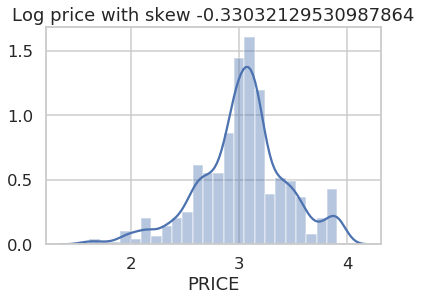

In [159]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

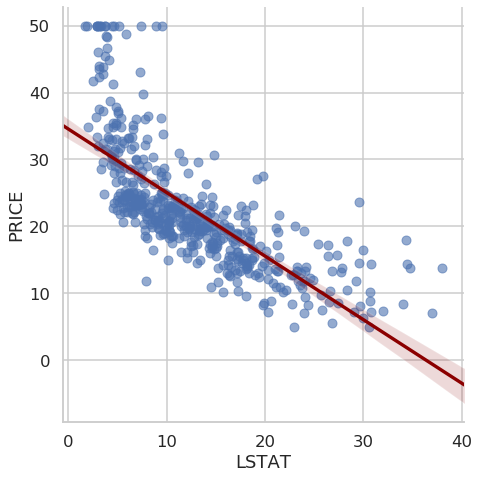

In [160]:
# plot the regression line against a scatter plot
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

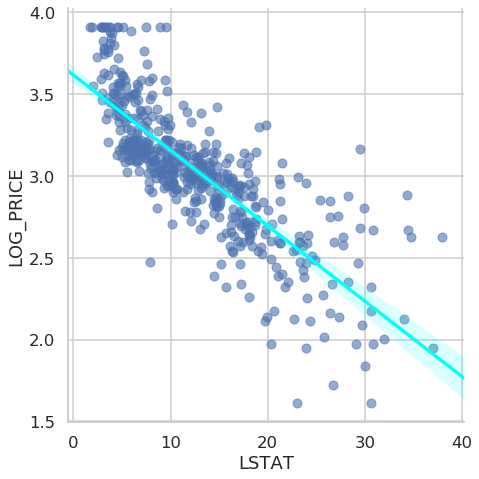

In [161]:
# using features varaible
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'cyan'})
plt.show()

## 71 - Regression using log prices

In [162]:
# show the log worked by getting a higher R-squared
# but this messed CHAS up
prices = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
Intercept 4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [163]:
# fix CHAS by reversing
# log_e can be reversed
print('corrected CHAS coef:', np.e**0.080475)

corrected CHAS coef: 1.0838017512597784


## 72 - p values & Evaluating Coefficients

In [164]:
# requires statsmodel import
X_incl_const = sm.add_constant(X_train)
# calling the OLS function
# Ordinary Least Squares
# it's a linear regression model
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#print('results.params: ', results.params)
#print('\n\nresults.pvalues:', results.pvalues)
# print side by side
# using round to get more readable results
print('looking for p-values over 0.05 is not significant')
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

looking for p-values over 0.05 is not significant


/home/zaphod/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## 73 - Testing for Multicollinearity
### VIF - Variance Inflation Factor

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [165]:
# this will generate a slice type error
# variance_inflation_factor(exog=X_incl_const, exog_idx=1)
# adding .values will retrun an array that is needed
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)
#type(X_incl_const)

1.7145250443932485

In [166]:
# print out the number of columns in X_incl_const
# both of these do the same thing
len(X_incl_const.columns)
print(X_incl_const.shape[1])

14


In [167]:
# for loop that prints out all the VIFs for all the features
for i in range(len(X_incl_const.columns)):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000576
4.410320817897634
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [168]:
# another for loop that prints out all the VIFs for all the features
# but will add them to a list
vif = [] # empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000576, 4.410320817897634, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [169]:
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]
# add a dataframe, prints nicer
# np.around rounds a number
# 1st arg is the value
# 2nd arg is the number of decimal points
print('any feature w/ a number over 10 might be an issue')
pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)})

any feature w/ a number over 10 might be an issue


,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [170]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## 74 - Model Simplification & the BIC

In [171]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()
# store the data in a variable
org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -139.74997769478875
r-squared is 0.7930234826697582


In [172]:
# Reduced model #1 excluding INDUS (industry metric)
# to compare with the BIC from above
# want the lower value of BIC
# but don't want to change Rsquared much
X_incl_const = sm.add_constant(X_train)
# drop INDUST
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [173]:
# Reduced model #2 excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
# remove INDUST and AGE
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)
print('removing INDIST and AGE does not seem to have a large impact')

BIC is -149.49934294224678
r-squared is 0.7918657661852815
removing INDIST and AGE does not seem to have a large impact


In [174]:
frames = [org_coef, coef_minus_indus, reduced_coef]
print('NaN indicates missing value, Not a Number')
#pd.concat(frames, axis=1, sort=False)
pd.concat(frames, axis=1, sort=True)

NaN indicates missing value, Not a Number


,coef,p-value,coef,p-value,coef,p-value
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## 76 - Residuals & Residual Plots



the cyan line represents a perfect prediction


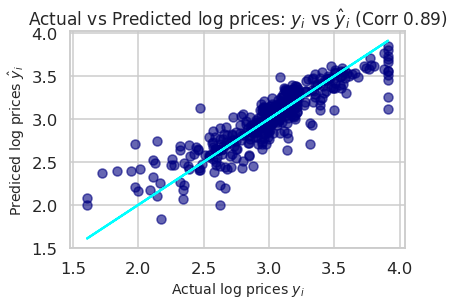



model is not doing well on the high end of home prices


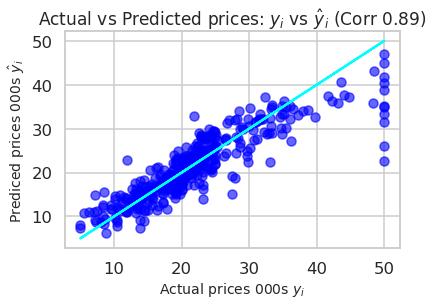

In [175]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['PRICE']) # Use log prices
# drop the price, industry, and age
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals 
# these 2 do the same thing, just different wat
#residuals = y_train - results.fittedvalues
# results.resid
#print(residuals)


# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
# y_train is actual values
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
# the cyan line represents a perfect predecition
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

print('\n\nthe cyan line represents a perfect prediction')
plt.show()

# to see the actual prices reverse the transformation
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

print('\n\nmodel is not doing well on the high end of home prices')
plt.show()

## 77 - Residuals & Residual Plots



Want residuals centered around zero
and somewhat random and symetric
but the high price homes are the line on the top right


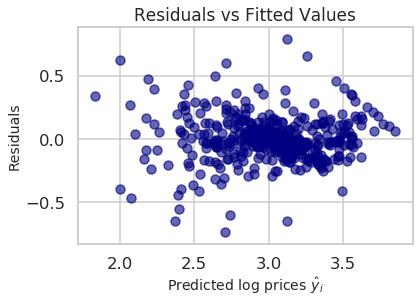

In [176]:
# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

print('\n\nWant residuals centered around zero')
print('and somewhat random and symetric')
print('but the high price homes are the line on the top right')
plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)



Want residuals Skew and Mean to be around zero


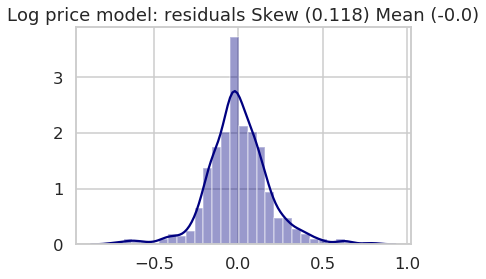

In [177]:
# Distribution of Residuals (log prices) - checking for normality
# get the mean
resid_mean = round(results.resid.mean(), 3)
# get the skew
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
print('\n\nWant residuals Skew and Mean to be around zero')
plt.show()

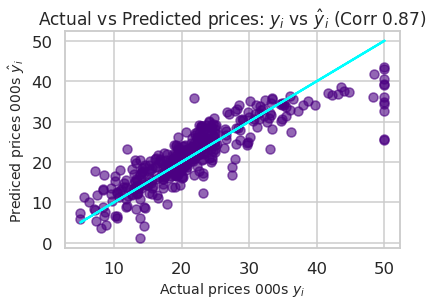

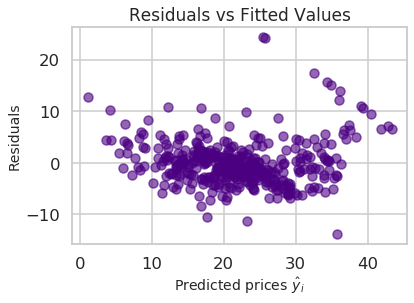

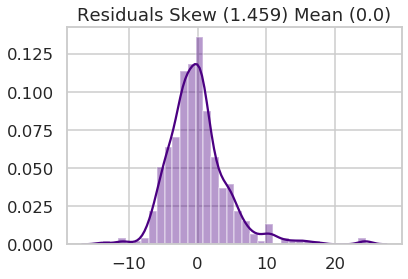

In [185]:
# Challenge: Using the original model with all the features and normal prices generate:
# 1 - Plot of actual vs predicted prices (incl. correlation) using a different colour
# 2 - Plot of residuals vs. predicted prices
# Plot of distribution of residuals (incl. skew)
# Analyse the results. 

# Original model: normal prices & all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

## 78. Making Predictions (Part 1): MSE & R-Squared

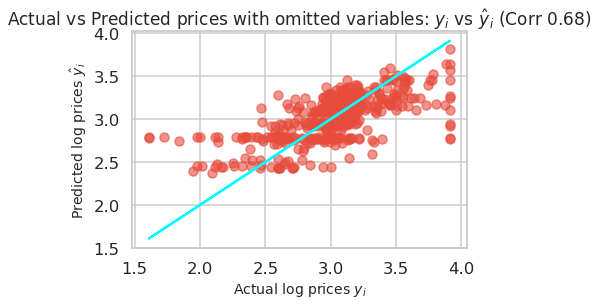

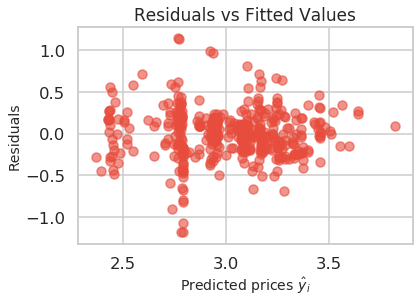

In [186]:
# Model Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [192]:
print('R squared is a relative measure of fit, always between 0 and 1. The higher the better')
print('\nMSE is an absolute measurte of fit, the units are the target, price in this case')
print('These MSEs are not apples to apples since they are not all the same unit')
print('The lower the MSE the better')

pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])


R squared is a relative measure of fit, always between 0 and 1. The higher the better

MSE is an absolute measurte of fit, the units are the target, price in this case
These MSEs are not apples to apples since they are not all the same unit
The lower the MSE the better


,R-Squared,MSE,RMSE
Reduced Log Model,0.46,0.090,0.300000
Full Normal Price Model,0.75,19.921,4.463295
Omitted Var Model,0.46,0.090,0.300000


In [193]:
# estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 standard deviation in log prices is', np.sqrt(reduced_log_mse))
print('2 standard deviations in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 standard deviation in log prices is 0.3
2 standard deviations in log prices is 0.6
The upper bound in log prices for a 95% prediction interval is  4.0011973816621555
The upper bound in normal prices is $ 54663.564011715265
The lower bound in log prices for a 95% prediction interval is  2.8011973816621554
The lower bound in normal prices is $ 16464.34908282079


## 80. Build a Valuation Tool (Part 1): Working with Pandas Series & Numpy ndarrays